## Setup

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

import cehd

In [2]:
%%time 

path_settings = {
    'cehd_file' : 'Input/Processed/osha_data.csv',
    'qualif_conv_file' : 'Input/Raw/OSHA/CEHD/CEHD1984_2018/cleaning scripts/Conversion tables/qualif_new_2020.csv',
    'unit_conv_file' : 'Input/Raw/OSHA/CEHD/CEHD1984_2018/cleaning scripts/Conversion tables/unit_conv_2020.csv',
    'it_directory' : 'Input/Raw/OSHA/CEHD/CEHD1984_2018/cleaning scripts/Conversion tables IT',
    'cehd_log_file' : 'cehd_log_file.json'
} 

# Load the cleaned R dataframe for comparison
r_exposure_data_file = 'r_exposure_data.parquet'
r_exposure_data = pd.read_parquet(r_exposure_data_file).set_index('V1')

raw_exposure_data = pd.read_csv(path_settings['cehd_file'], index_col=0)

# Apply the Python-based implementation
py_exposure_data = cehd.clean_chemical_exposure_health_data(raw_exposure_data, path_settings)

py_exposure_data

<timed exec>:13: DtypeWarning: Columns (1,6,10,11,19) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: total: 28.2 s
Wall time: 1min 5s


,AIR_VOLUME_SAMPLED,BLANK_USED,CITY,DATE_REPORTED,DATE_SAMPLED,EIGHT_HOUR_TWA_CALC,ESTABLISHMENT_NAME,FIELD_NUMBER,IMIS_SUBSTANCE_CODE,INSPECTION_NUMBER,...,ZIP_CODE,CENSORED,SAMPLE_RESULT_2,UNIT_OF_MEASUREMENT_2,QUALIFIER_2,SAMPLE_WEIGHT_2,SAMPLE_RESULT_3,INSTRUMENT_TYPE_2,HASH,CONCAT
4,74.000,N,East Farmingdale,1984-04-27,1984-04-04,NaN,MID ISLAND NON FERROUS FOUNDRY,2LI84-49,1591,111252,...,11735.0,N,0.0640,M,detected,0.000,0.0640,ID121,111252-1591-5245345.0-2LI84-49,N00046-NY-11735.0-1984-37.0-0.0
7,74.000,N,East Farmingdale,1984-04-27,1984-04-04,NaN,MID ISLAND NON FERROUS FOUNDRY,2LI84-49,1840,111252,...,11735.0,N,0.0000,M,ND,0.000,0.0000,ID121,111252-1840-5245345.0-2LI84-49,N00046-NY-11735.0-1984-37.0-0.0
9,74.000,N,East Farmingdale,1984-04-27,1984-04-04,NaN,MID ISLAND NON FERROUS FOUNDRY,2LI84-49,0731,111252,...,11735.0,N,0.0063,M,detected,0.000,0.0063,ID121,111252-0731-5245345.0-2LI84-49,N00046-NY-11735.0-1984-37.0-0.0
85,0.783,N,Passaic,1984-05-18,1984-05-02,NaN,PANTASOTE INC,K167,2580,113951,...,7055.0,N,1.4000,P,detected,0.000,1.4000,GC-FID,113951-2580-5269568.0-K167,J00522-NJ-7055.0-1984-15.0-0.0
118,3.000,N,Clifton,1984-04-27,1984-04-10,NaN,IBG INC BLEACHETTE BLUING DIV,976,2280,114033,...,7015.0,N,19.0000,P,detected,0.000,19.0000,GC-FID,114033-2280-5269873.0-976,K00477-NJ-7015.0-1984-15.0-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154104,163.000,N,ALLIANCE,1996-09-30,1996-08-16,NaN,"ASF-KEYSTONE, AMER.STEEL FOUNDRIES",B031,9010,300100930,...,44601.0,N,0.0000,%,ND,0.086,0.0000,ID142,300100930-9010-913379467.0-B031,R58750-OH-44601.0-1996-97.0-0.086
577271,741.000,N,FAIRVIEW,1989-06-02,1989-05-09,NaN,FAIRVIEW CASTINGS COMPANY,R3E 526,9010,785857,...,16415.0,N,0.2440,M,detected,1.392,0.2440,ID142,785857-9010-1072230.0-R3E 526,R28266-PA-16415.0-1989-436.0-1.392
577282,737.000,N,FAIRVIEW,1989-06-02,1989-05-09,NaN,FAIRVIEW CASTINGS COMPANY,R3E 527,9010,785857,...,16415.0,N,0.0600,M,detected,0.535,0.0600,ID142,785857-9010-1072248.0-R3E 527,R28267-PA-16415.0-1989-431.0-0.535
577272,723.000,N,FAIRVIEW,1989-06-02,1989-05-09,NaN,FAIRVIEW CASTINGS COMPANY,R3E 528,9010,785857,...,16415.0,N,0.1190,M,detected,2.000,0.1190,ID142,785857-9010-1072255.0-R3E 528,R28268-PA-16415.0-1989-423.0-2.0


In [3]:
N_cleaning_steps = len(cehd.CLEANING_STEPS)
print(f'{N_cleaning_steps} cleaning steps:')
cehd.CLEANING_STEPS

32 cleaning steps:


['pre_clean',
 'remove_blanks',
 'remove_nonpersonal',
 'remove_rare_or_nonchemical',
 'replace_missing_values',
 'add_censored_column',
 'remove_invalid_nondetect',
 'clean_unit_of_measurement',
 'remove_blk_not_bulk',
 'remove_uninterpretable_qualifier',
 'remove_conflicting_qualifier',
 'remove_blk_possible_bulk_not_blank',
 'remove_combustion_related',
 'remove_fibers_substance_conflict',
 'remove_yttrium_substance_conflict',
 'remove_approximate_measure',
 'remove_qualifier_unit_mismatch',
 'remove_invalid_fibers_unit',
 'remove_empty_unit_non_null_result',
 'remove_percent_greater_than_100',
 'create_detection_indicator',
 'remove_invalid_unit',
 'convert_percent_to_mass_concentration',
 'remove_missing_office_identifier',
 'remove_missing_time_sampled',
 'remove_null_time_sampled',
 'remove_negative_sample_result',
 'remove_missing_sample_number',
 'remove_missing_volume',
 'remove_zero_volume_sampled',
 'clean_instrument_type',
 'clean_duplicates']

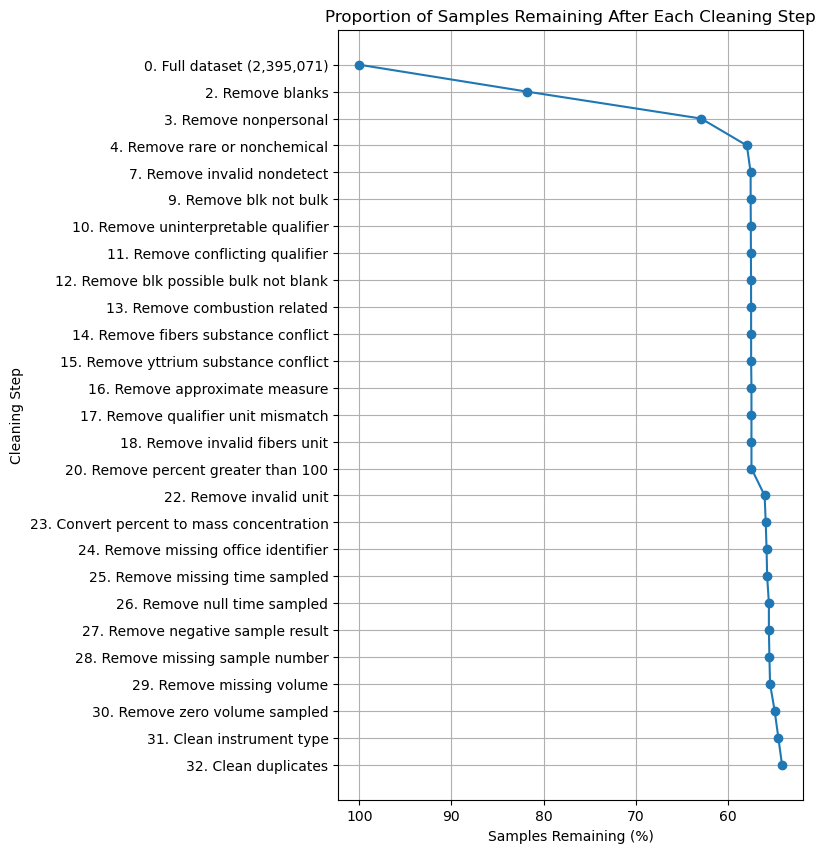

In [4]:
initial_count = len(raw_exposure_data)
_ = cehd.plot_cumulative_changes(path_settings['cehd_log_file'], initial_count)

Further inspection of the cleaned dataframes reveals that the numbers of remaining samples are unequal. As shown, the R dataframe has a couple hundred additional samples. This is not necessarily a problem of inconsistent translation, as shown in the next cell.

In [3]:
print(f'R dimensions: {r_exposure_data.shape}')
print(f'Python dimensions: {py_exposure_data.shape}')

N_additional = len(r_exposure_data) - len(py_exposure_data)
print(f'{N_additional} samples in the R dataframe')

R dimensions: (1296123, 35)
Python dimensions: (1295902, 35)
221 samples in the R dataframe


As shown below, these additional samples stem from a couple bugs in the R code. 

1. An  incorrect end value was hardcoded in the sequence generation function ("seq"). This bug was addressed in the Python code by defining the function parameters automatically based on the length of the dataframe, rather than through hardcoding.
2. The remainder were introduced through incorrect parsing of strings to numeric values in the R code. Specifically, the R code treated '0' and '0.0' as distinct values. The Python code addresses this issue by treating both values as numeric zero and then removing them both.

In [4]:
N_missing = r_exposure_data.isna().all(axis=1).sum()
print(f'{N_missing} rows in the R dataframe were accidently inserted')
r_exposure_data.tail()

219 rows in the R dataframe were accidently inserted


,AIR_VOLUME_SAMPLED,BLANK_USED,CITY,DATE_REPORTED,DATE_SAMPLED,EIGHT_HOUR_TWA_CALC,ESTABLISHMENT_NAME,FIELD_NUMBER,IMIS_SUBSTANCE_CODE,INSPECTION_NUMBER,...,ZIP_CODE,CENSORED,SAMPLE_RESULT_2,UNIT_OF_MEASUREMENT_2,QUALIFIER_2,SAMPLE_WEIGHT_2,SAMPLE_RESULT_3,INSTRUMENT_TYPE_2,HASH,CONCAT
V1,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,None,None,None,NaN,None,None,None,None,...,NaN,None,NaN,None,None,NaN,NaN,None,None,None
NaN,NaN,NaN,None,None,None,NaN,None,None,None,None,...,NaN,None,NaN,None,None,NaN,NaN,None,None,None
NaN,NaN,NaN,None,None,None,NaN,None,None,None,None,...,NaN,None,NaN,None,None,NaN,NaN,None,None,None
NaN,NaN,NaN,None,None,None,NaN,None,None,None,None,...,NaN,None,NaN,None,None,NaN,NaN,None,None,None
NaN,NaN,NaN,None,None,None,NaN,None,None,None,None,...,NaN,None,NaN,None,None,NaN,NaN,None,None,None


The following cell ignores the excess rows in the R dataframe and checks the most important columns to ensure data consistency.

In [34]:
r_exposure_data, py_exposure_data = r_exposure_data.align(py_exposure_data, join='inner')

def check_if_equivalent(a, b, column):
    are_equivalent = all(a[column].notnull() == b[column].notnull())
    print(f'{column} columns are equivalent? {are_equivalent}')

print(f'Are the dataframes equal? {r_exposure_data.equals(py_exposure_data)}')
_ = check_if_equivalent(r_exposure_data, py_exposure_data, 'NAICS_CODE'), 
_ = check_if_equivalent(r_exposure_data, py_exposure_data, 'SAMPLE_RESULT_3'), 

Are the dataframes equal? False
NAICS_CODE columns are equivalent? True
SAMPLE_RESULT_3 columns are equivalent? True


## Summary and Next Steps